In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/plant

/content/drive/MyDrive/Colab Notebooks/plant


In [1]:
import numpy as np
import os
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.applications.densenet import DenseNet121
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from PIL import Image

In [2]:
# 랜덤시드 고정시키기
np.random.seed(3)

In [3]:
# 1. 데이터 생성하기
train_datagen = ImageDataGenerator(rescale=1./255)
# 이미지 픽셀값을 0~1사이의 값으로 맞춰주기 위함.

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/plant/dataset/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')   


Found 3625 images belonging to 10 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/plant/dataset/test',
        target_size=(64, 64),    
        batch_size=32,
        class_mode='categorical')


Found 2017 images belonging to 10 classes.


In [5]:
categories = test_generator.class_indices

for a in enumerate (categories):
    print(a)

(0, 'left1')
(1, 'left2')
(2, 'left3')
(3, 'left4')
(4, 'left_normal')
(5, 'right1')
(6, 'right2')
(7, 'right3')
(8, 'right4')
(9, 'right_normal')


In [6]:
# 쉽게 눈의 카테고리를 확인할 수 있도록 텍스트 파일 생성
category_dir = os.path.join(os.getcwd(), '/content/drive/MyDrive/Colab Notebooks/plant/semiconductor/aiedusecond')
if not os.path.exists(category_dir):
    os.makedirs(category_dir)

with open(os.path.join(category_dir, '/content/drive/MyDrive/Colab Notebooks/plant/semiconductor/aiedusecond/목록확인.txt'), 'w')as f:
    for line in categories:
        f.write(line + "\n")

In [7]:
#6. 모델 구성하기

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(64,64,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               7372928   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 7,392,965
Trainable params: 7,392,965
Non-trainable params: 0
______________________________________________

In [14]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
#loss = 현재 가중치 세트를 평가하는 데 사용한 손실함수. 다중 클래스 문제이므로 categorical_crossentropy 지정
# optimizer = 최적의 가중치를 검색하는 데 사용되는 최적화 알고리즘. 경사 하강법 알고리즘 중 하나 인 adam 사용
# metrics = 평가 척도를 나타냄. 분류 문제에서는 일반적으로 accuracy로 지정.

In [15]:
# 4. 모델 학습시키기
hist = model.fit(train_generator,
                 steps_per_epoch=3,
                 epochs=20,
                 validation_data=test_generator,
                 validation_steps=5)

Epoch 1/20
3/3 [==============================] - 151s 63s/step - loss: 2.5344 - accuracy: 0.2604 - val_loss: 2.4412 - val_accuracy: 0.1250
Epoch 2/20
3/3 [==============================] - 139s 58s/step - loss: 1.7869 - accuracy: 0.3229 - val_loss: 1.7740 - val_accuracy: 0.1750
Epoch 3/20
3/3 [==============================] - 126s 53s/step - loss: 1.3290 - accuracy: 0.4479 - val_loss: 1.7237 - val_accuracy: 0.1688
Epoch 4/20
3/3 [==============================] - 123s 52s/step - loss: 1.2096 - accuracy: 0.5208 - val_loss: 1.5006 - val_accuracy: 0.3313
Epoch 5/20
3/3 [==============================] - 116s 48s/step - loss: 1.1974 - accuracy: 0.5625 - val_loss: 1.4624 - val_accuracy: 0.2375
Epoch 6/20
3/3 [==============================] - 108s 43s/step - loss: 1.2105 - accuracy: 0.5521 - val_loss: 2.0968 - val_accuracy: 0.2688
Epoch 7/20
3/3 [==============================] - 108s 45s/step - loss: 1.2432 - accuracy: 0.5625 - val_loss: 1.7492 - val_accuracy: 0.2875
Epoch 8/20
3/3 [====

In [ ]:
# 5. 모델 평가하기
print("-- Evaluate --")
scores = model.evaluate(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 6. 모델 사용하기
print("-- Predict --")
output = model.predict(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)
# 클래스별 확률 벡터로 출력

-- Evaluate --
5/5 [==============================] - 19s 4s/step - loss: 1.3672 - accuracy: 0.5688
accuracy: 56.88%
-- Predict --
{'left1': 0, 'left2': 1, 'left3': 2, 'left4': 3, 'left_normal': 4, 'right1': 5, 'right2': 6, 'right3': 7, 'right4': 8, 'right_normal': 9}
[[0.007 0.012 0.004 ... 0.060 0.087 0.186]
 [0.010 0.010 0.003 ... 0.000 0.000 0.001]
 [0.065 0.694 0.093 ... 0.017 0.007 0.001]
 ...
 [0.001 0.009 0.001 ... 0.024 0.012 0.003]
 [0.117 0.280 0.037 ... 0.050 0.069 0.010]
 [0.030 0.145 0.029 ... 0.105 0.069 0.024]]


In [ ]:
# 모델 저장
model_dir = '/content/drive/MyDrive/Colab Notebooks/plant/semiconductor/model'
hdf5_file = '/content/drive/MyDrive/Colab Notebooks/plant/semiconductor/hd5'

if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
if not os.path.exists(hdf5_file):
    model.save_weights(hdf5_file)

model_path = model_dir + '/multi_img_classification.model'

model.save('/content/drive/MyDrive/Colab Notebooks/plant/semiconductor/my_model.h5')

In [ ]:
# 테스트

test_image = '/content/drive/MyDrive/Colab Notebooks/plant/semiconductor/test_photo2.png'
image_name = test_image.split('/')

img = Image.open(test_image)
img = img.convert("RGB")
img = img.resize((64,64))
data = np.asarray(img)

X = np.array(data)
X = X.astype("float")/256
X = X.reshape(-1,64,64,3)

pred = model.predict(X)
result = [np.argmax(value) for value in pred]
print('{} 로 예상되는 진단은: '.format(image_name[-1]), result[0], "(번째) 입니다.")
print(pred)

#0 1 2 3 4 5

test_photo2.png 로 예상되는 진단은:  5 (번째) 입니다.
[[0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000]]


No handles with labels found to put in legend.


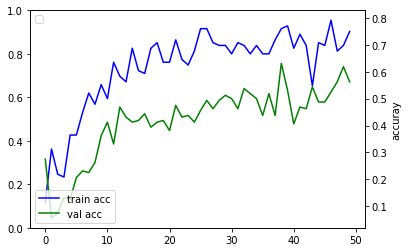

In [ ]:
# 모델 학습 과정 표시

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

# loss_ax.plot(hist.history['loss'], 'y', label='train loss')
# loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

# loss_ax.set_xlabel('epoch')
# loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()
# acc, 정확도
# loss, 손실

No handles with labels found to put in legend.


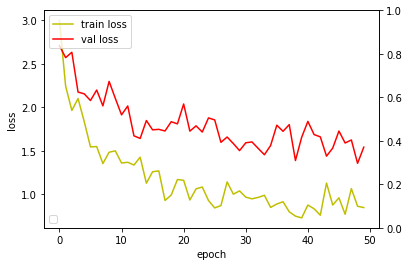

In [ ]:
# 모델 학습 과정 표시

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

# acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
# acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
# acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()
# acc, 정확도
# loss, 손실